Bank Loan Case Study

In [ ]:
# Importing Python Libraries/Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

#Setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

In [ ]:
#Suppresing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the input files
Application_Data = pd.read_csv("C:/Users/91848/Desktop/bank data/application_data.csv")
Previous_Application = pd.read_csv("C:/Users/91848/Desktop/bank data/previous_application.csv")

In [ ]:
#Reading the first 5 Rows of the data
Application_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
Previous_Application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Database Dimension
print("The dimension of Application_data:",Application_Data.shape)
print("The dimension of Previous_Application:",Previous_Application.shape)

The dimension of Application_data: (307511, 122)
The dimension of Previous_Application: (1670214, 37)


In [41]:
#Database size
print("The size of Application_data:",Application_Data.size)
print("The size of Previous_Application:",Previous_Application.size)

The size of Application_data: 37516342
The size of Previous_Application: 61797918


In [42]:
#Column types
Application_Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [43]:
Previous_Application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [44]:
#Checking the Numeric Variables 
Application_Data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [45]:
Previous_Application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [46]:
# Percentage of null values in each column of Application_Data
round(Application_Data.isnull().sum() / Application_Data.shape[0] * 100.00,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

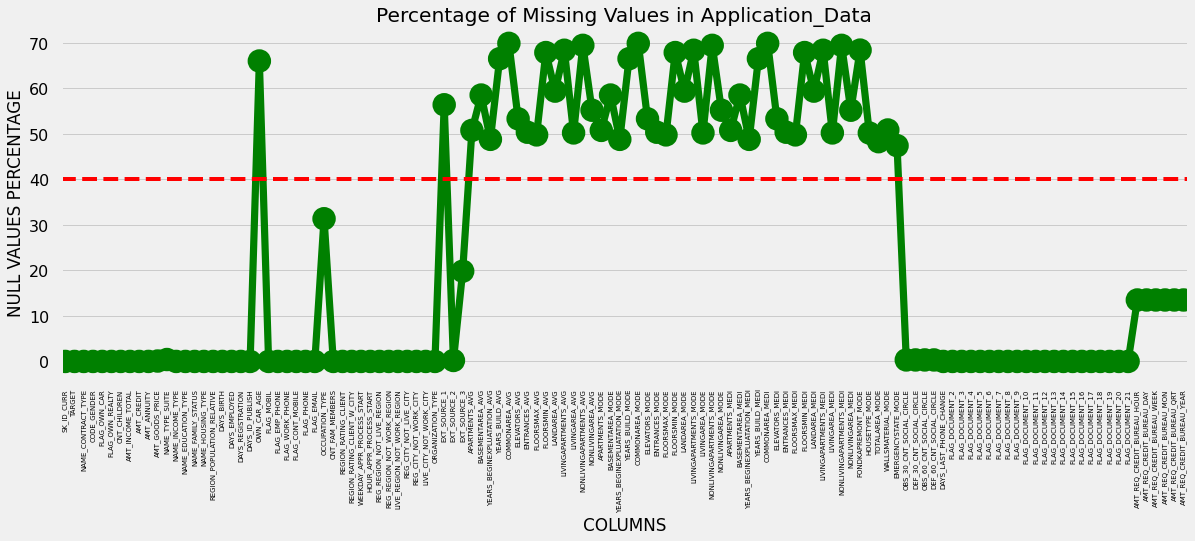

In [47]:
#Plotting in a Graph
null_Application = pd.DataFrame((Application_Data.isnull().sum())*100/Application_Data.shape[0]).reset_index()
null_Application.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_Application, color='green')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Application_Data")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [48]:
#Checking the columns which have more than 40% missing values
app_data_null_40 = null_Application[null_Application["Null Values Percentage"]>=40]
app_data_null_40

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [49]:
print('Number of Columns that have missing values greater than 40% :', len(app_data_null_40))

Number of Columns that have missing values greater than 40% : 49


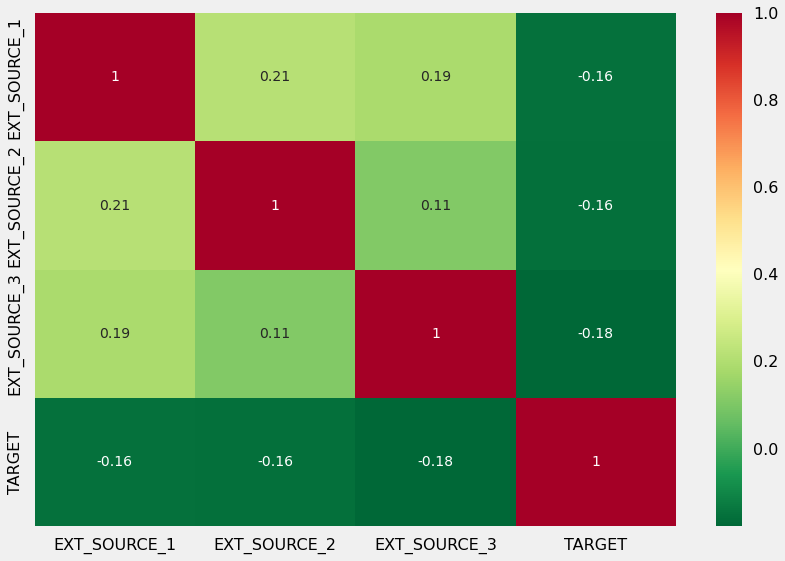

In [50]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = Application_Data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn_r")


In [51]:
# create a list of columns that needs to be dropped including the columns with > 40% null values
New_Application = app_data_null_40["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 

# as EXT_SOURCE_1 column is already included in app_data_null_40 
len(New_Application)

51

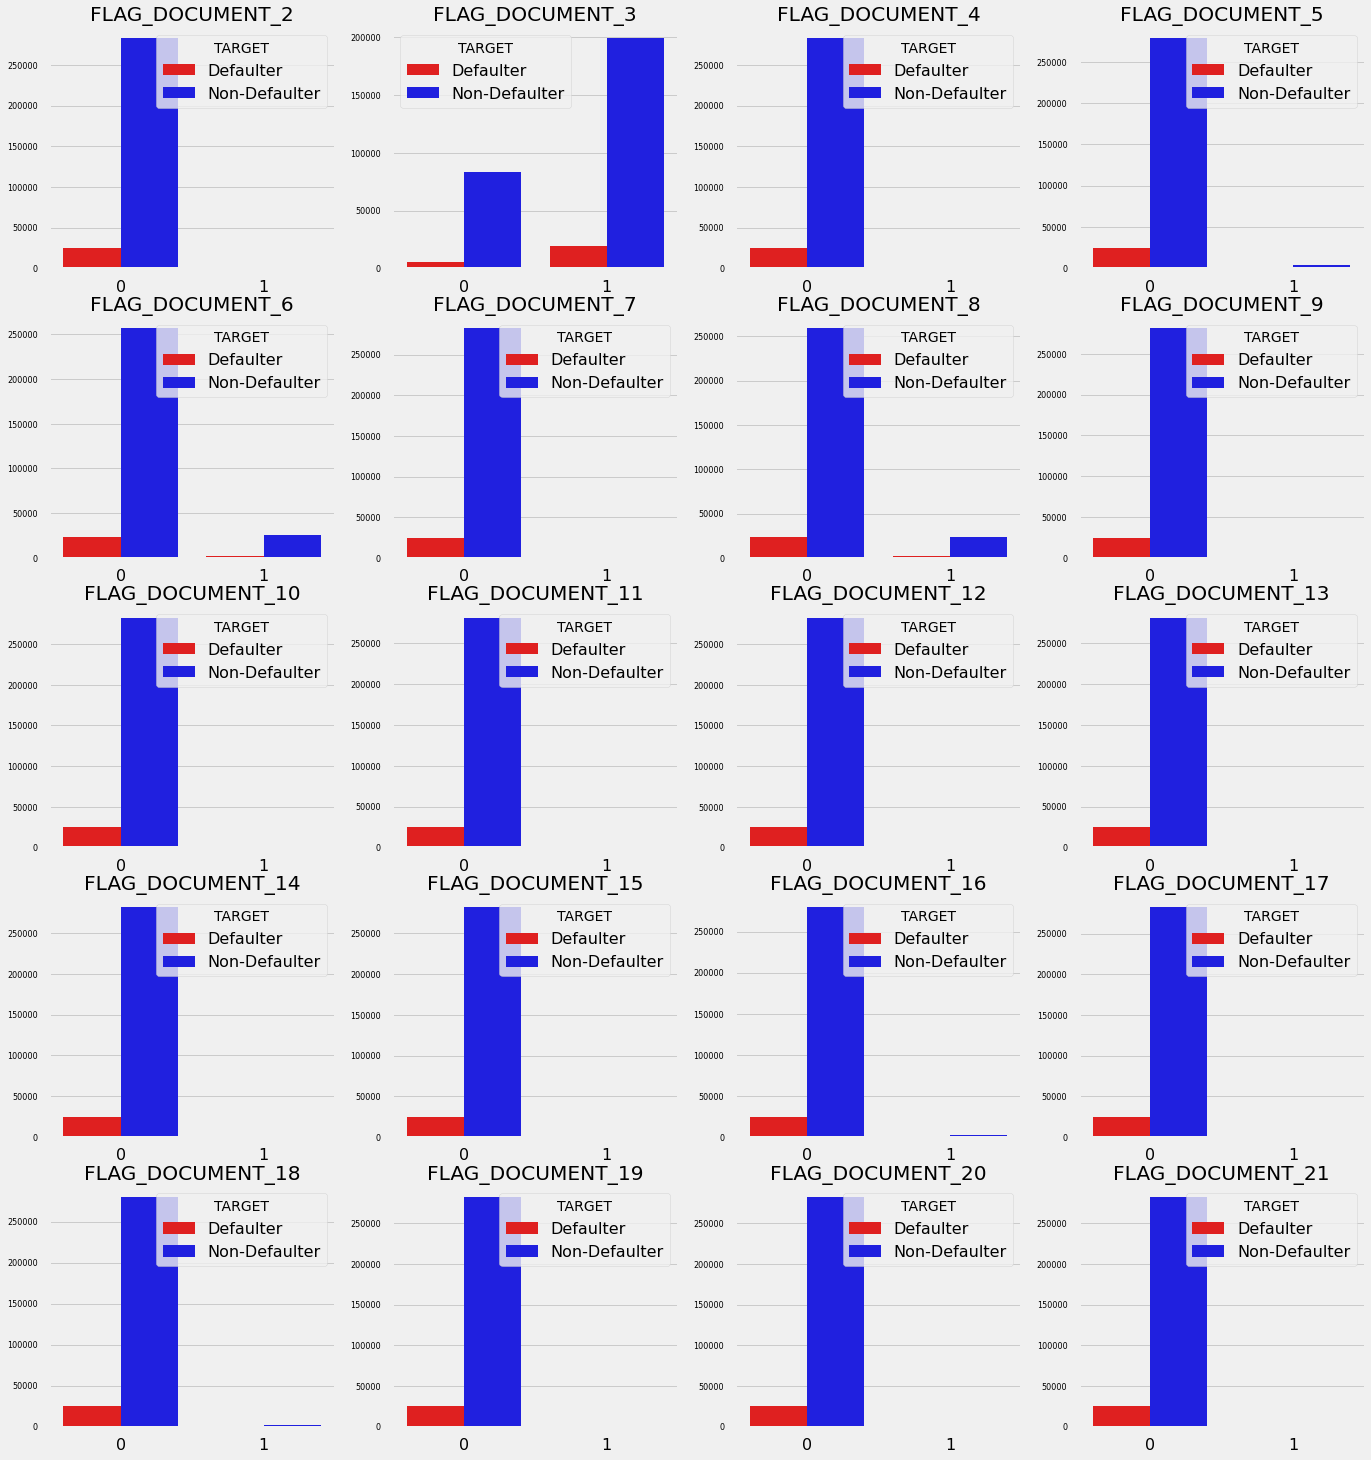

In [52]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
flag_col = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = Application_Data[flag_col+["TARGET"]]

length = len(flag_col)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Non-Defaulter"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(flag_col,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [53]:
# Adding the flag documents for dropping the columns
flag_col.remove('FLAG_DOCUMENT_3') 
New_Application = New_Application + flag_col
len(New_Application)

70

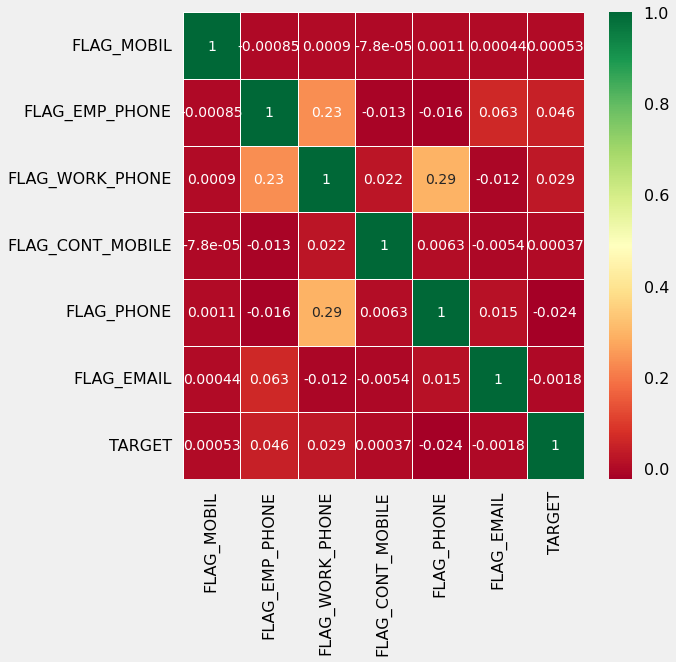

In [54]:
# Checking the correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = Application_Data[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=0.5)

In [55]:
# Adding the 6 FLAG columns to be dropped
contact_col.remove('TARGET') 
New_Application = New_Application + contact_col
len(New_Application)

76

In [56]:
# Dropping the unnecessary columns from Application_Data
Application_Data.drop(labels=New_Application,axis=1,inplace=True)

In [57]:
#Verifying the shape of the dataframe 
print('New Shape of the Dataframe: ',Application_Data.shape)

New Shape of the Dataframe:  (307511, 46)


In [58]:
# Describing the dataset and observing the changes
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [59]:
# Percentage of null values in each column of Previous_Application
round(Previous_Application.isnull().sum() / Previous_Application.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

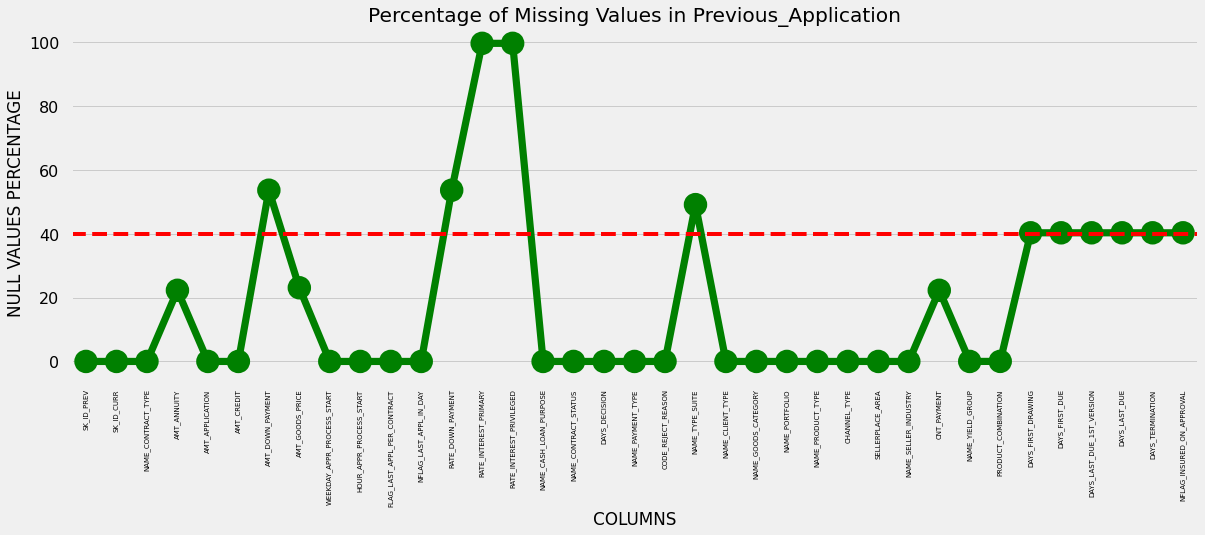

In [60]:
#Plotting in a Graph
null_Previous = pd.DataFrame((Previous_Application.isnull().sum())*100/Previous_Application.shape[0]).reset_index()
null_Previous.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_Previous, color='green')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Previous_Application")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [61]:
#Checking the columns which have more than 40% missing values
prev_app_null_40 = null_Previous[null_Previous["Null Values Percentage"]>=40]
prev_app_null_40

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [62]:
print('Number of Columns that have missing values greater than 40% :', len(prev_app_null_40))

Number of Columns that have missing values greater than 40% : 11


In [63]:
# Listing down the columns which are not needed for the analysis
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [64]:
# Getting the 11 columns which has more than 40% unknown
New_Previous = prev_app_null_40["Column Name"].tolist()
New_Previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [65]:
New_Previous = New_Previous + Unnecessary_previous
len(New_Previous)

15

In [66]:
# Dropping the unnecessary columns from Previous_Application
Previous_Application.drop(labels=New_Previous,axis=1,inplace=True)

In [67]:
#Verifying the shape of the dataframe 
print('New Shape of the Dataframe: ',Previous_Application.shape)

New Shape of the Dataframe:  (1670214, 22)


In [68]:
# Describing the dataset and observing the changes
Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [69]:
# Converting Negative days to Positive days as days cannot be negative

days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in days_col:
    Application_Data[col] = abs(Application_Data[col])

In [70]:
# Binning Numerical Columns to create a Categorical Column

# Creating bins for income amount
Application_Data['AMT_INCOME_TOTAL'] = Application_Data['AMT_INCOME_TOTAL'] / 100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

Application_Data['AMT_INCOME_RANGE'] = pd.cut(Application_Data['AMT_INCOME_TOTAL'], bins, labels=slot)

In [71]:
Application_Data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

In [72]:
# Creating bins for Credit amount
Application_Data['AMT_CREDIT'] = Application_Data['AMT_CREDIT'] / 100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

Application_Data['AMT_CREDIT_RANGE'] = pd.cut(Application_Data['AMT_CREDIT'], bins=bins, labels=slots)

In [73]:

Application_Data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [74]:
# Creating bins for Age
Application_Data['AGE'] = Application_Data['DAYS_BIRTH'] // 365

bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

Application_Data['AGE_GROUP']=pd.cut(Application_Data['AGE'], bins=bins, labels=slots)

In [75]:
Application_Data['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

In [76]:
# Creating bins for Employement Time
Application_Data['YEARS_EMPLOYED'] = Application_Data['DAYS_EMPLOYED'] // 365

bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

Application_Data['EMPLOYMENT_YEAR']=pd.cut(Application_Data['YEARS_EMPLOYED'], bins=bins, labels=slots)

In [77]:
Application_Data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

In [78]:
# inspecting the column types if they are in correct data type using the above result.
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [79]:
#Conversion of Object and Numerical columns to Categorical Columns
numerical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in numerical_columns:
    Application_Data[col] =pd.Categorical(Application_Data[col])

In [80]:
# inspecting the column types if the above conversion is reflected
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [81]:
#Converting negative days to positive days 
Previous_Application['DAYS_DECISION'] = abs(Previous_Application['DAYS_DECISION'])

In [82]:
Previous_Application['DAYS_DECISION_GROUP'] = (
    (Previous_Application['DAYS_DECISION'] - (Previous_Application['DAYS_DECISION'] % 400))
    .astype(str) + '-' +
    ((Previous_Application['DAYS_DECISION'] - (Previous_Application['DAYS_DECISION'] % 400) + 400))
    .astype(str))


In [83]:
Previous_Application['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

In [84]:
# inspecting the column types if they are in correct data type.
Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [85]:
#Converting from Object to categorical 
Object_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Object_col:
    Previous_Application[col] =pd.Categorical(Previous_Application[col])

In [86]:
# inspecting the column types if the above conversion is reflected
Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

In [87]:
# checking the null value % of each column in Application_Data dataframe
Impute_Col = round(Application_Data.isnull().sum() / Application_Data.shape[0] * 100.00,2)
Impute_Col

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

In [88]:
#collect all the columns with impute/improper data
impute_cols_list = Impute_Col[Impute_Col>0].index.tolist()
print('List of Columns where we need to impute missing values appropriately:\n\n',impute_cols_list)

List of Columns where we need to impute missing values appropriately:

 ['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'EMPLOYMENT_YEAR']


In [89]:
#observing all the rows with null values
null_data = Application_Data[Application_Data.isnull().any(axis=1)]
null_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,0.675000,1.350000,6750.0,...,0.0,0.0,0.0,0.0,0-100K,100K-200K,52,50 above,0,NaN
3,100006,0,Cash loans,F,N,Y,0,1.350000,3.126825,29686.5,...,NaN,NaN,NaN,NaN,100K-200K,300k-400k,52,50 above,8,5-10
8,100011,0,Cash loans,F,N,Y,0,1.125000,10.196100,33826.5,...,0.0,0.0,0.0,1.0,100K-200K,1M Above,55,50 above,1000,NaN
9,100012,0,Revolving loans,M,N,Y,0,1.350000,4.050000,20250.0,...,NaN,NaN,NaN,NaN,100K-200K,400k-500k,39,30-40,5,0-5
11,100015,0,Cash loans,F,N,Y,0,0.384192,1.483650,10678.5,...,0.0,0.0,0.0,2.0,0-100K,100K-200K,55,50 above,1000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,456245,0,Cash loans,F,N,Y,3,0.810000,2.695500,11871.0,...,NaN,NaN,NaN,NaN,0-100K,200k-300k,35,30-40,2,0-5
307504,456248,0,Cash loans,F,N,Y,0,1.530000,3.319200,16096.5,...,NaN,NaN,NaN,NaN,100K-200K,300k-400k,45,40-50,19,10-20
307505,456249,0,Cash loans,F,N,Y,0,1.125000,2.250000,22050.0,...,0.0,2.0,0.0,0.0,100K-200K,200k-300k,66,50 above,1000,NaN
307506,456251,0,Cash loans,M,N,N,0,1.575000,2.547000,27558.0,...,NaN,NaN,NaN,NaN,100K-200K,200k-300k,25,20-30,0,NaN


In [90]:
Application_Data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [91]:

Application_Data['NAME_TYPE_SUITE'].fillna((Application_Data['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [92]:
Application_Data['OCCUPATION_TYPE'] = Application_Data['OCCUPATION_TYPE'].cat.add_categories('Unknown')
Application_Data['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

In [93]:
Application_Data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [94]:
Amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in Amount:
    Application_Data[col].fillna(Application_Data[col].median(),inplace = True)

In [95]:
# checking the null value % of each column in Previous_Application dataframe
round(Previous_Application.isnull().sum() / Previous_Application.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

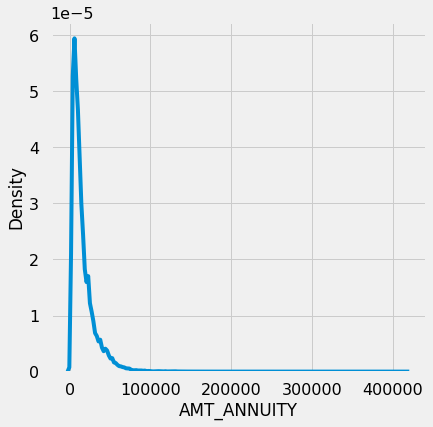

In [96]:
plt.figure(figsize=(6,6))
sns.kdeplot(Previous_Application['AMT_ANNUITY'])
plt.show()

In [97]:
Previous_Application['AMT_ANNUITY'].fillna(Previous_Application['AMT_ANNUITY'].median(),inplace = True)

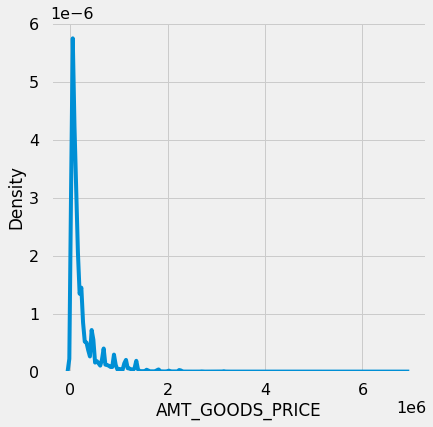

In [98]:
plt.figure(figsize=(6,6))
sns.kdeplot(Previous_Application['AMT_GOODS_PRICE'][pd.notnull(Previous_Application['AMT_GOODS_PRICE'])])
plt.show()

In [99]:
Previous_Application['AMT_GOODS_PRICE'].fillna(Previous_Application['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [100]:
Previous_Application.loc[Previous_Application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [101]:
Previous_Application['CNT_PAYMENT'].fillna(0,inplace = True)

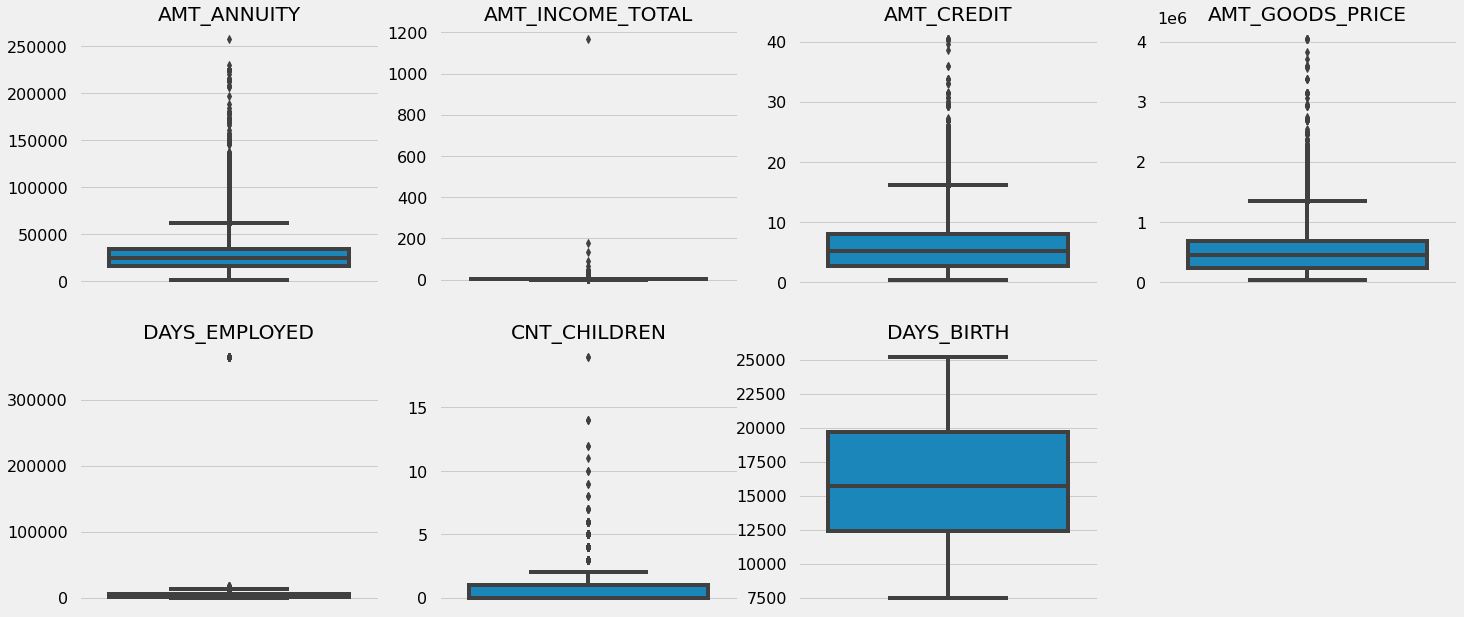

In [102]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Application_Data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=Application_Data[i[1]])
    plt.title(i[1])
    plt.ylabel("")


In [103]:
Application_Data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


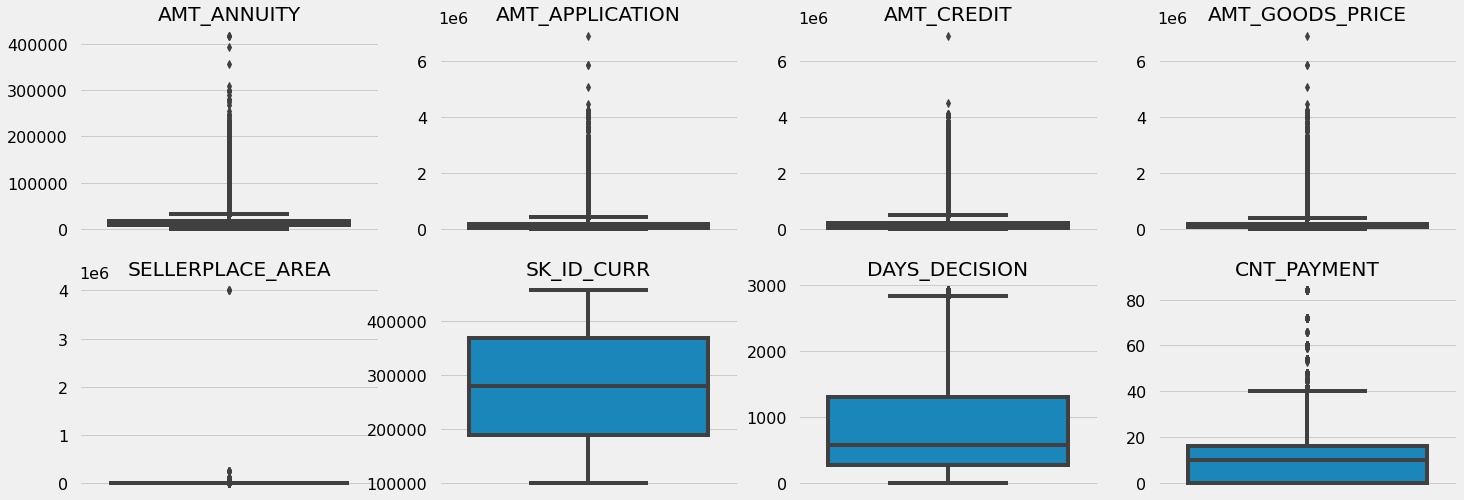

In [104]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Previous_Application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=Previous_Application[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

In [105]:
Previous_Application[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


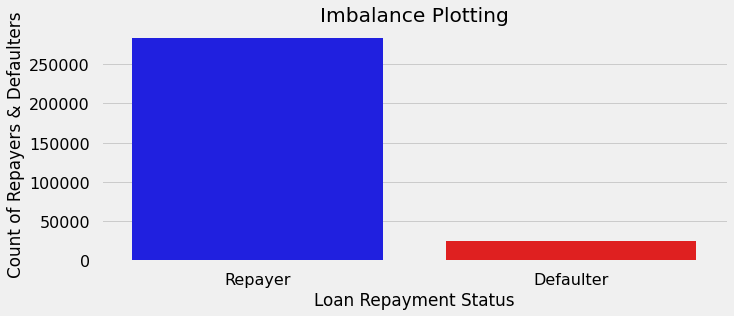

In [106]:
Imbalance = Application_Data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['b','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [107]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))



Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


In [108]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column
def univariate_categorical(feature, ylog=False, label_rotation=False, horizontal_layout=True):
    temp = Application_Data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = Application_Data[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"] * 100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 13))
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1,
                      x=feature,
                      data=Application_Data,
                      hue="TARGET",
                      order=cat_perc[feature],
                      palette=['g', 'r'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Blue'})
    ax1.legend(['Repayer', 'Defaulter'])

    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)", fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Blue'})

    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2,
                    x=feature,
                    y='TARGET',
                    order=cat_perc[feature],
                    data=cat_perc,
                    palette='Set2')

    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

    plt.show();



In [109]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [110]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=Application_Data, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [111]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    
    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [112]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

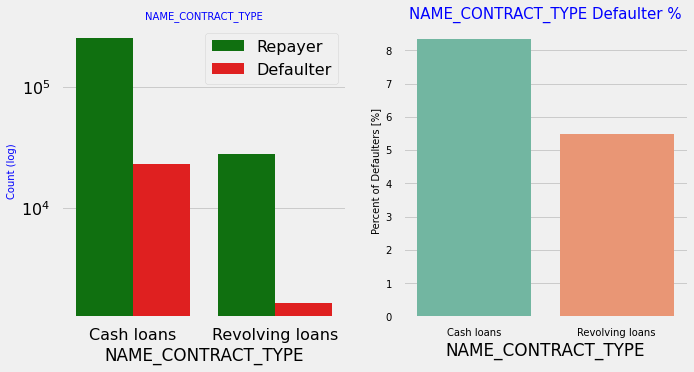

In [113]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

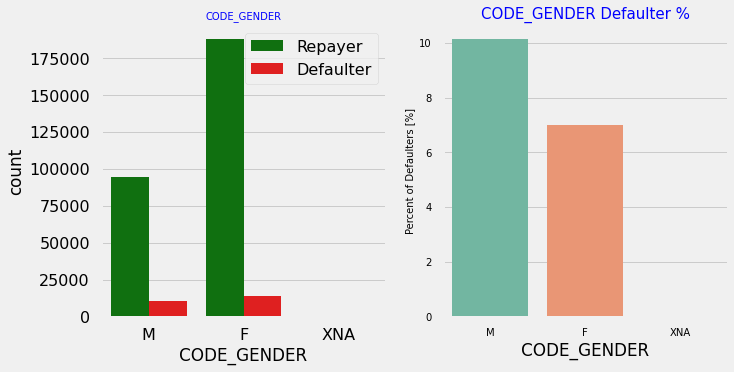

In [116]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

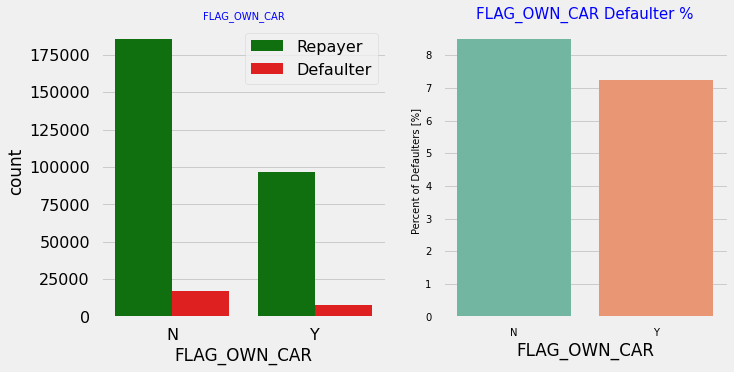

In [117]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

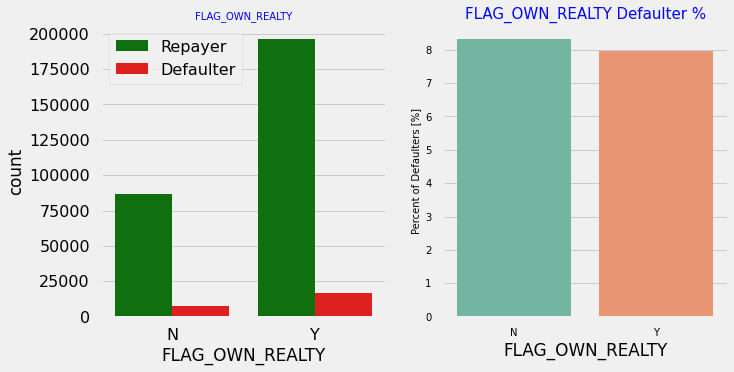

In [118]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

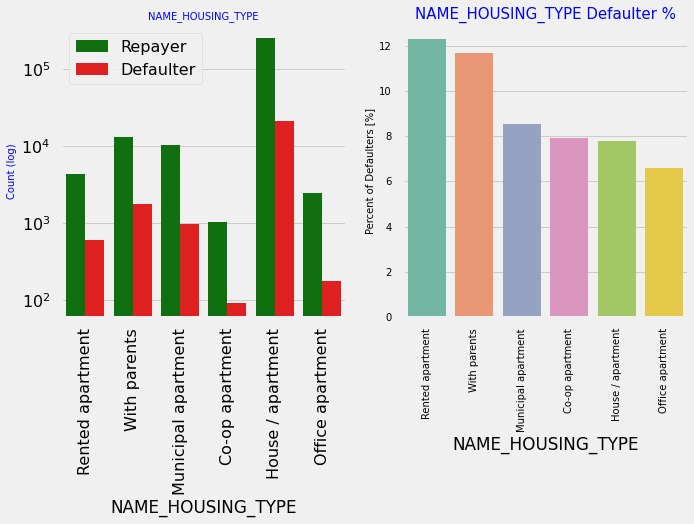

In [119]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

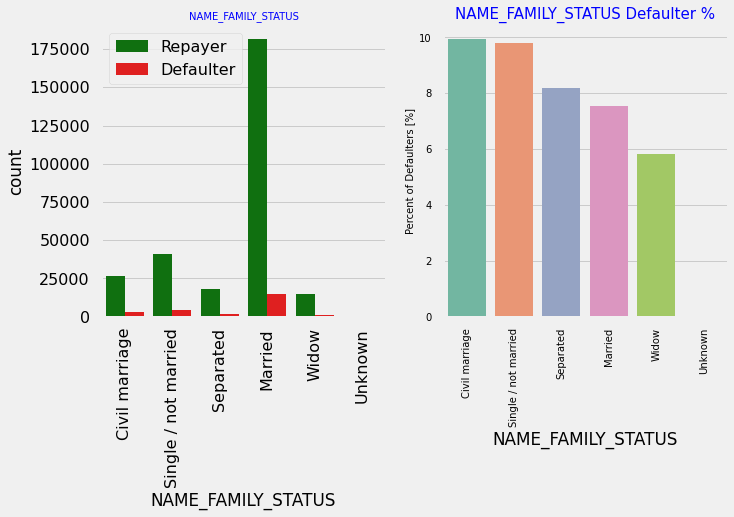

In [120]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

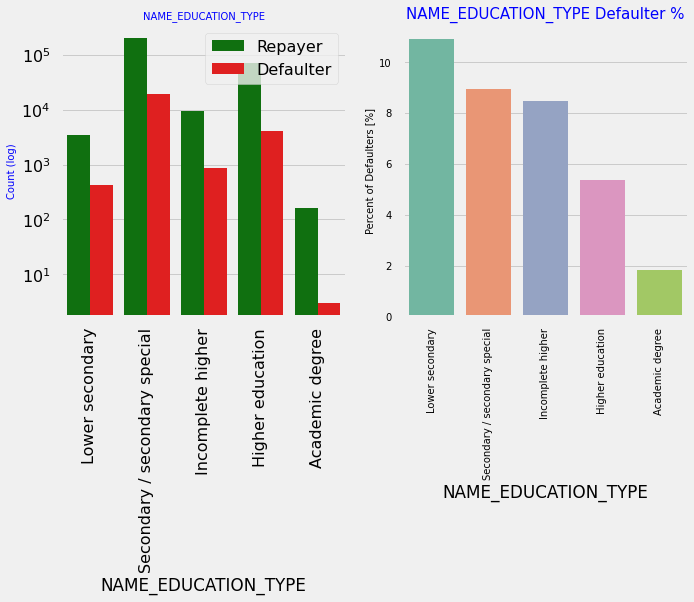

In [121]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

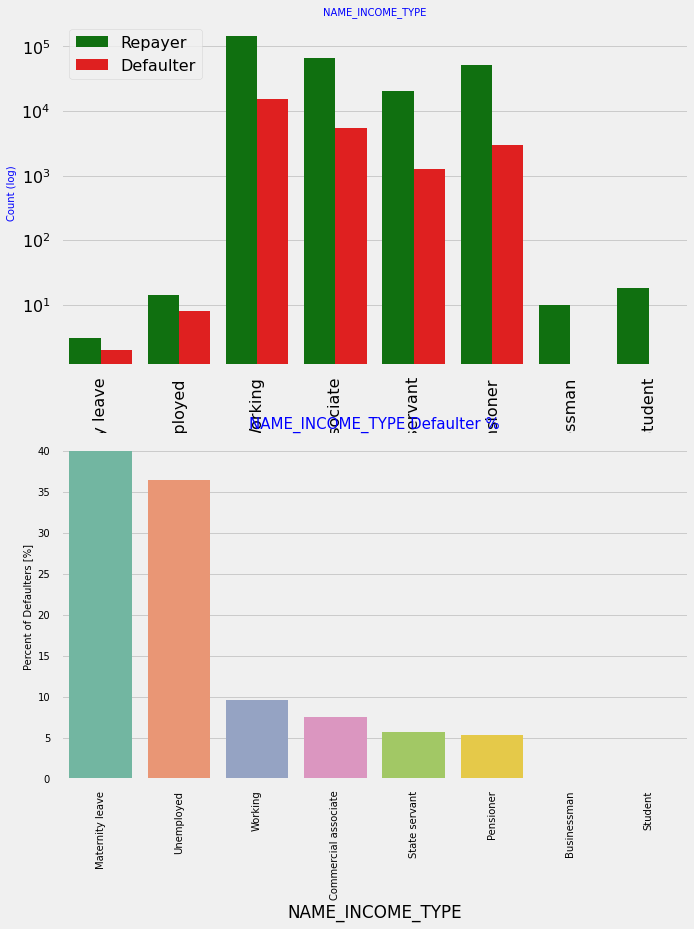

In [122]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

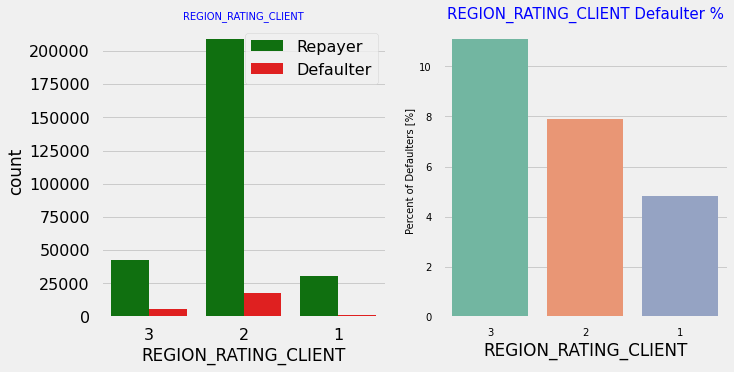

In [123]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

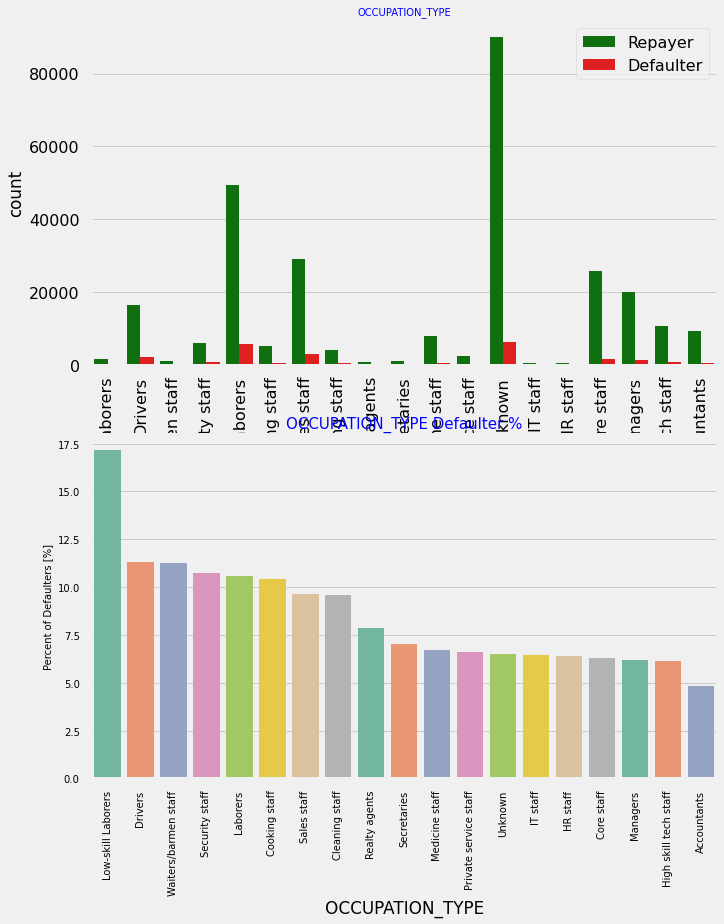

In [124]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

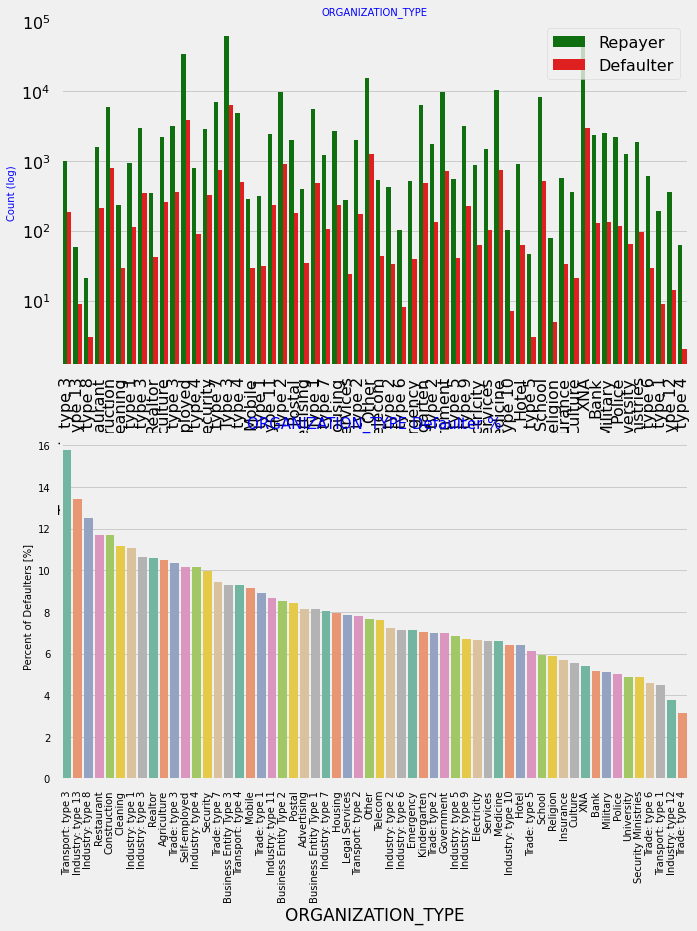

In [125]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

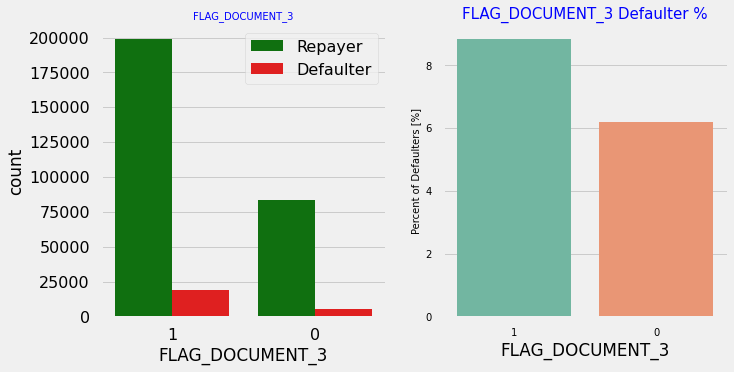

In [126]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

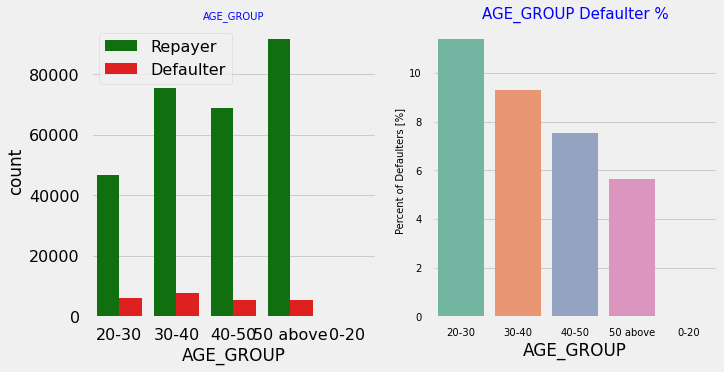

In [127]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

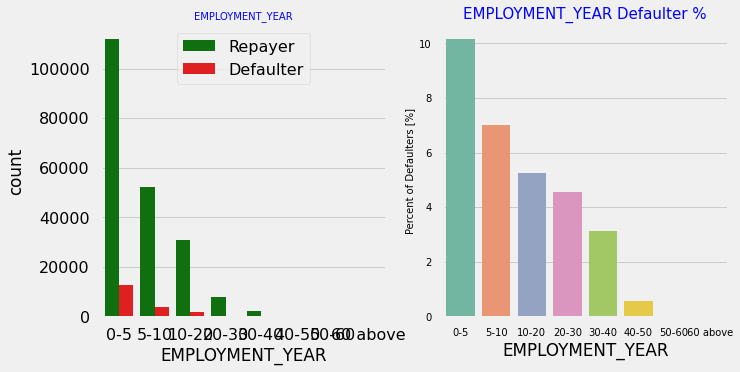

In [128]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

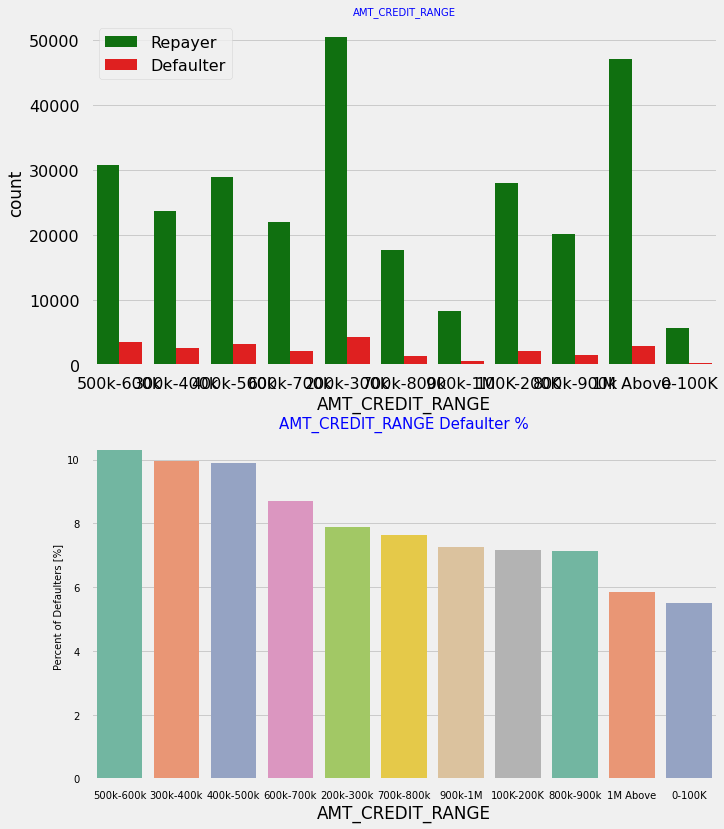

In [129]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

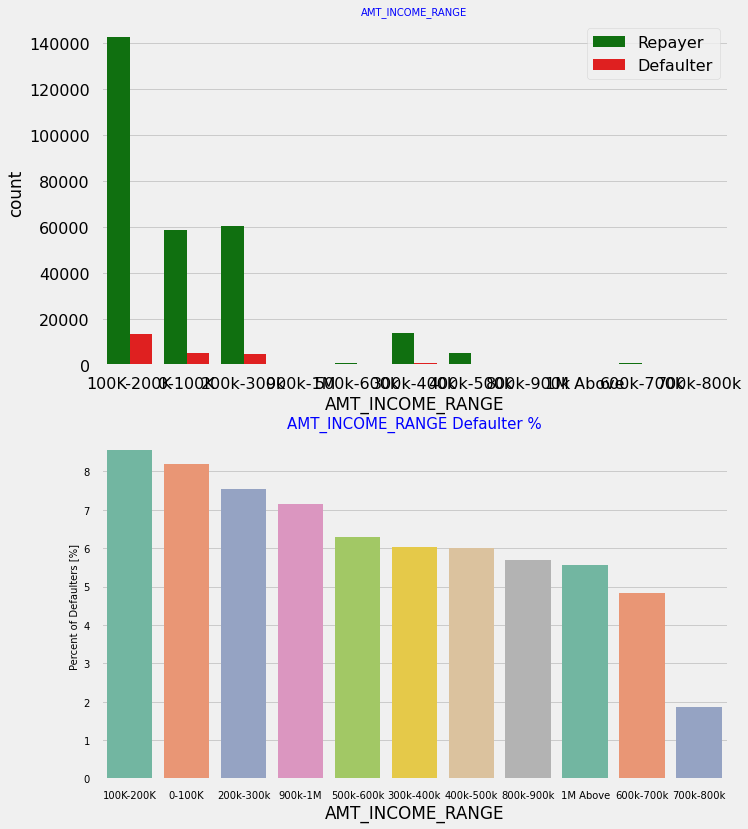

In [130]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

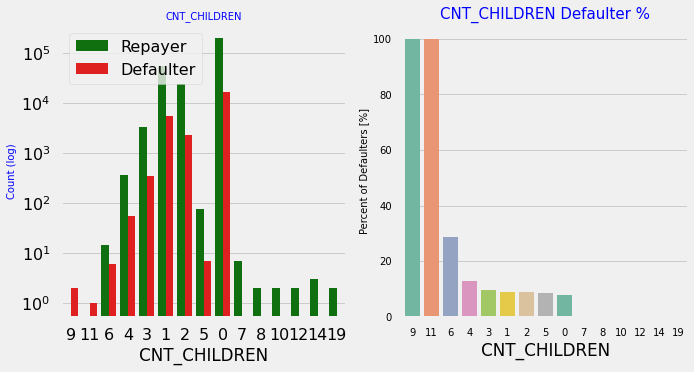

In [131]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

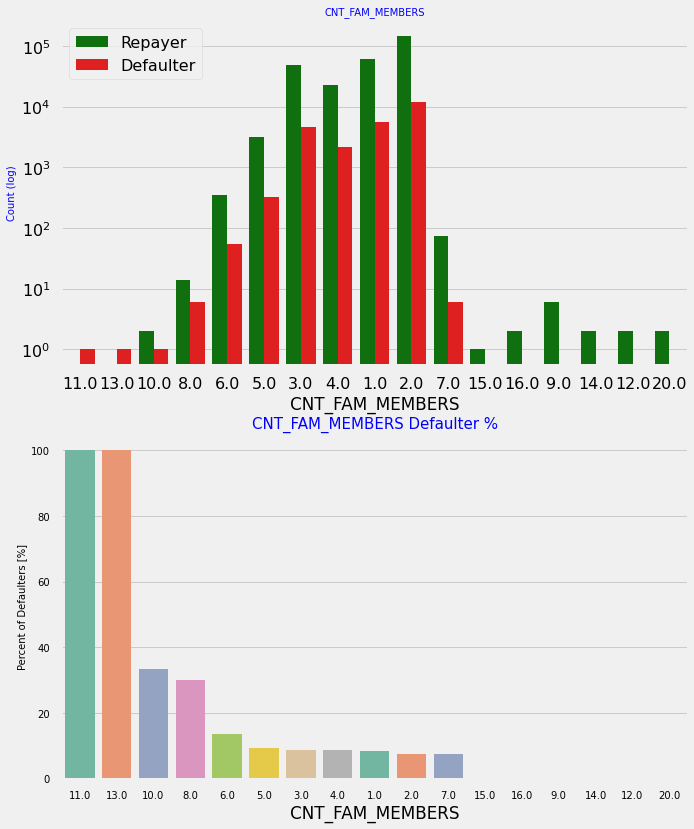

In [132]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

In [133]:
Application_Data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


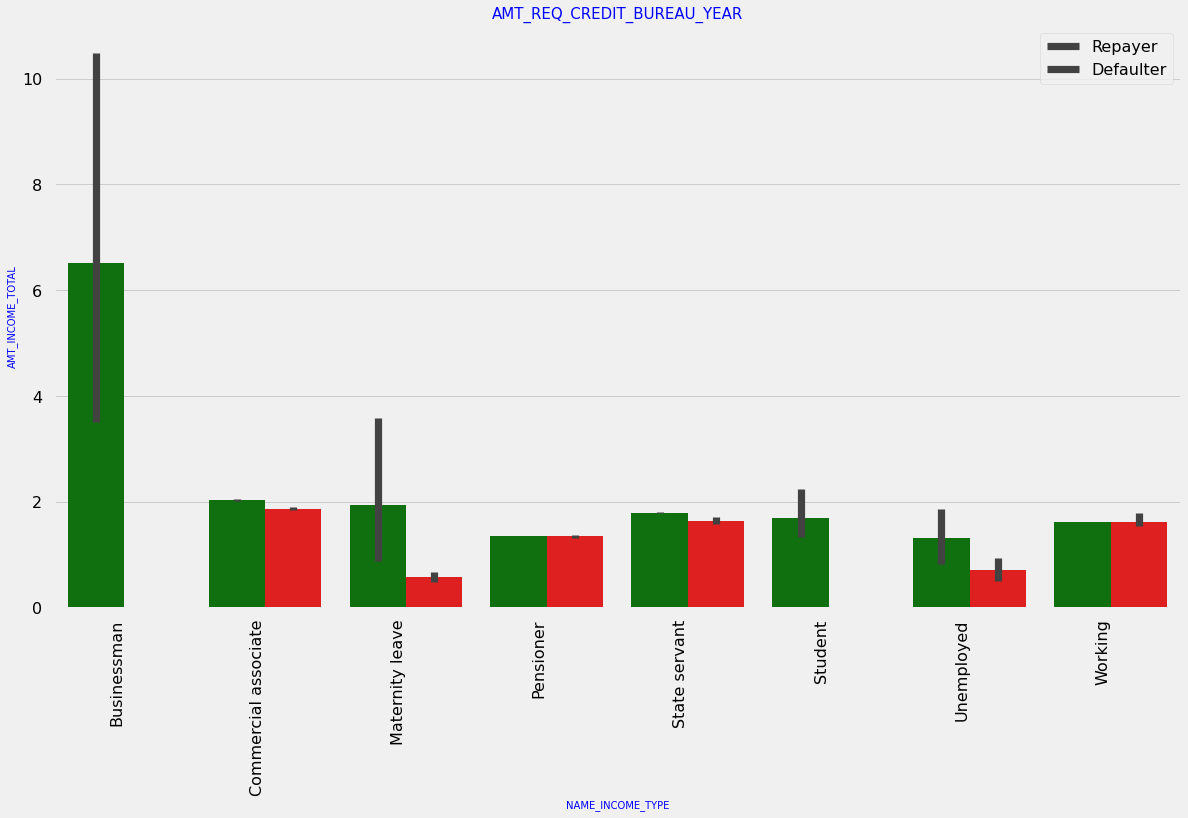

In [134]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",Application_Data,"TARGET",(18,10))

In [135]:
Application_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [137]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
corr_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = Application_Data.loc[Application_Data['TARGET']==0, corr_cols] # Repayers
Defaulter_df = Application_Data.loc[Application_Data['TARGET']==1, corr_cols] # Defaulters


In [138]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


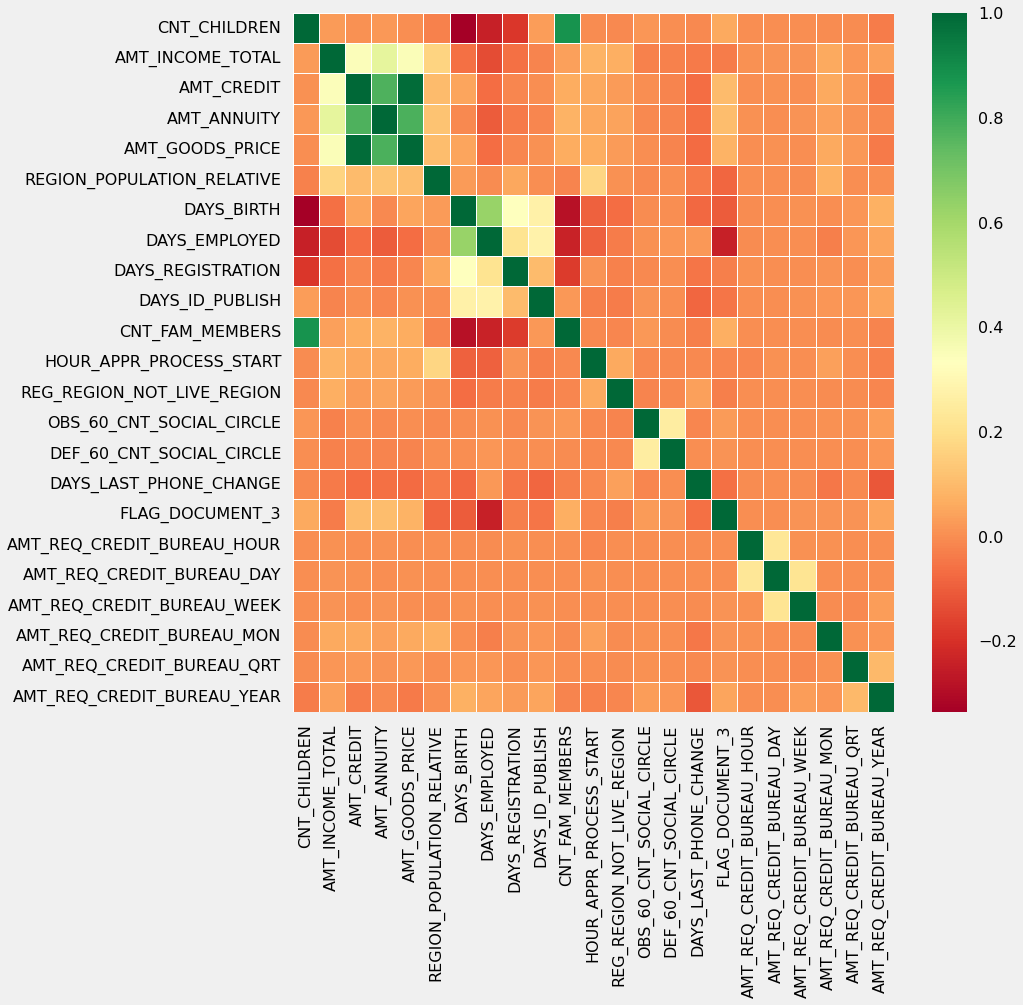

In [139]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

In [140]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
71,AMT_ANNUITY,AMT_CREDIT,0.752195
167,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
190,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
138,DAYS_BIRTH,CNT_CHILDREN,0.259109
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863


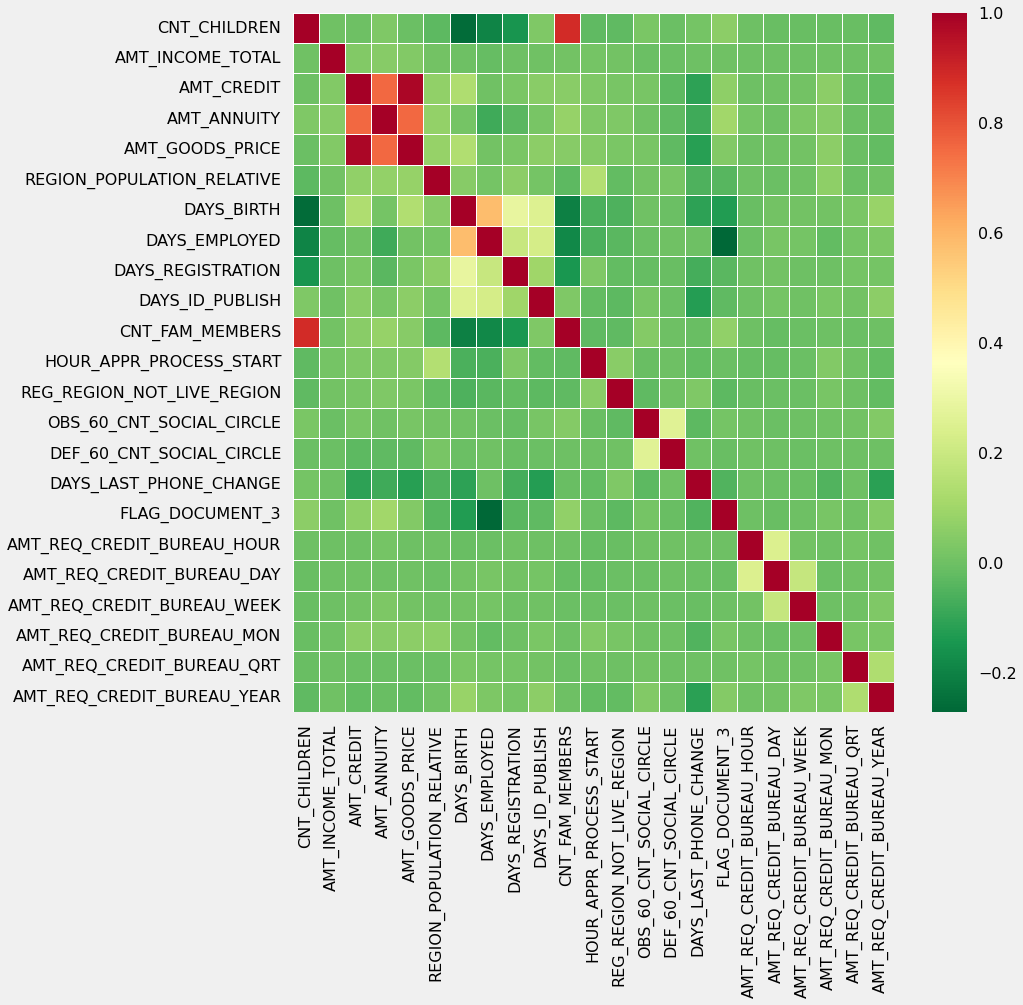

In [141]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn_r",annot=False,linewidth =1)

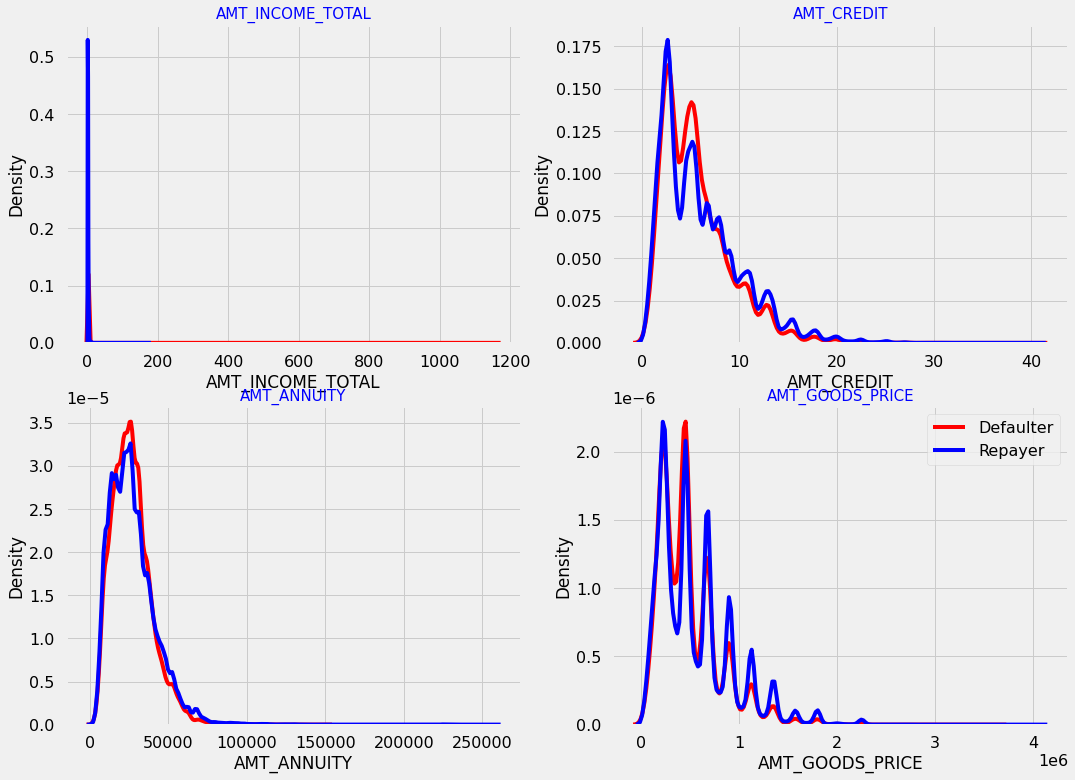

In [158]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = Application_Data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='b', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

<Figure size 1080x432 with 0 Axes>

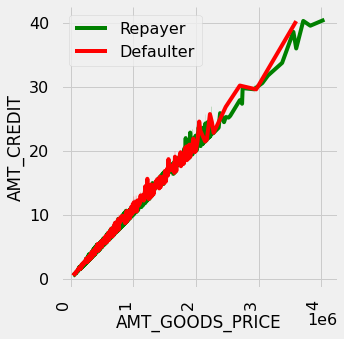

In [160]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',Application_Data,"TARGET", "line", ['b','r'], False,(15,6))

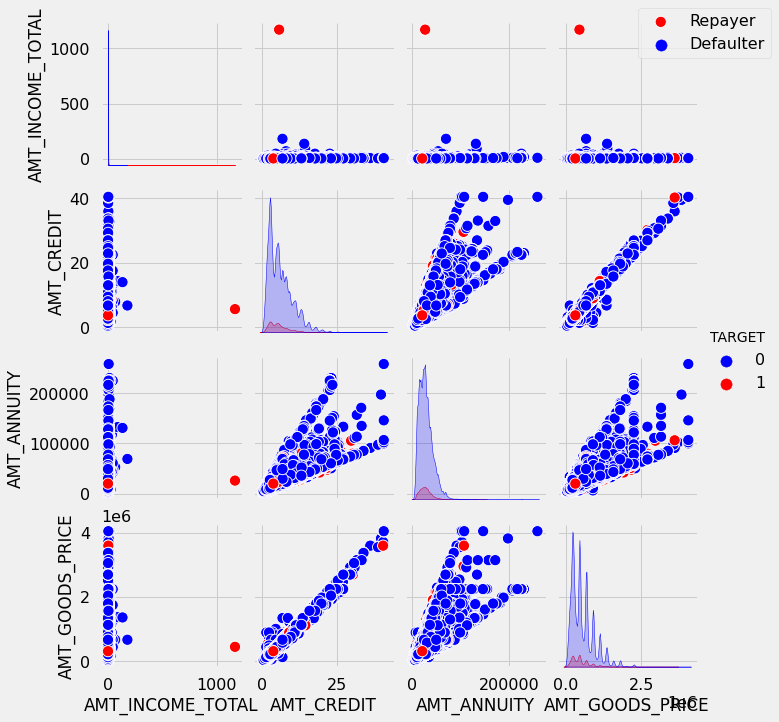

In [157]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = Application_Data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

In [145]:
#joining both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(Application_Data, Previous_Application, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,800-1200


In [146]:
#Checking the details of the merged dataframe
loan_process_df.shape

(1413701, 74)

In [147]:
# Checking the element count of the dataframe
loan_process_df.size

104613874

In [148]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [149]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,...,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,...,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,...,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.881244e+05,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,...,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,...,3.400000e+01,2.000000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,4.500000e+04,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,...,4.300000e+01,6.000000e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,7.087500e+04,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,...,5.400000e+01,1.700000e+01,2.384012e+06,1.674797e+04,1.800000e+05,2.156400e+05,1.800000e+05,1.313000e+03,8.500000e+01,1.800000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+03,4.050000e+01,2.250000e+05,4.050000e+06,7.250800e-02,2.520100e+04,3.652430e+05,...,6.900000e+01,1.000000e+03,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.922000e+03,4.000000e+06,8.400000e+01


In [150]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

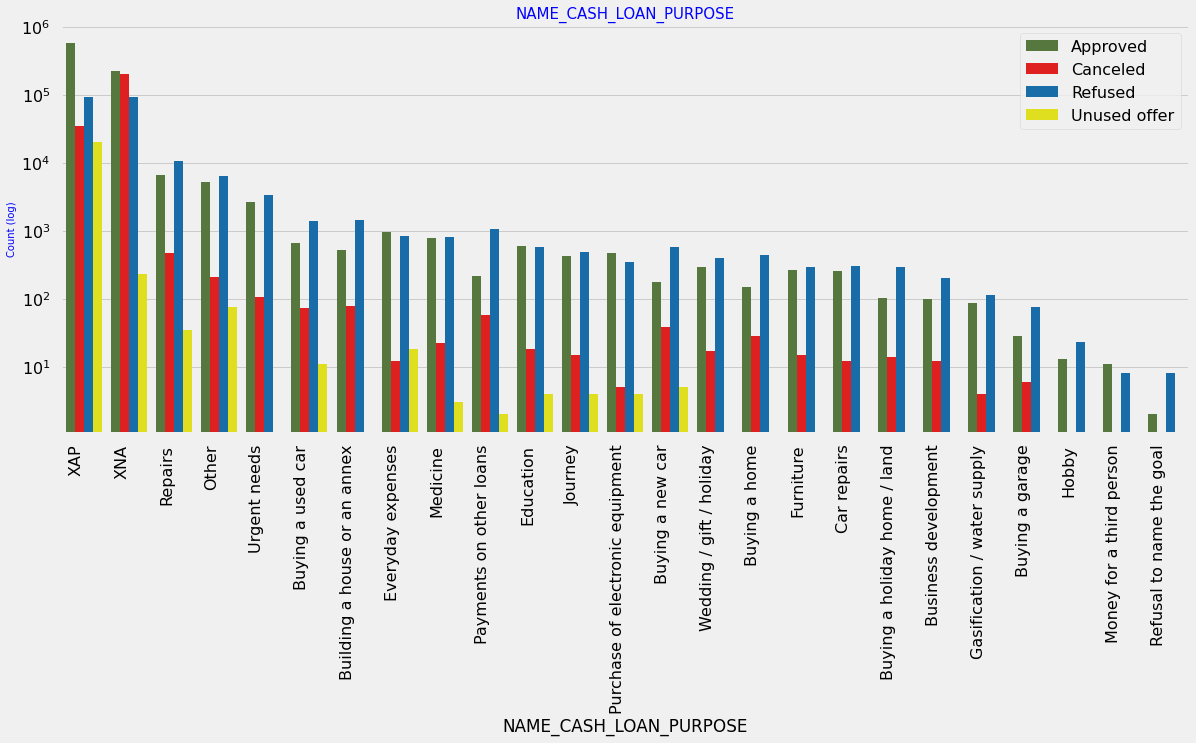

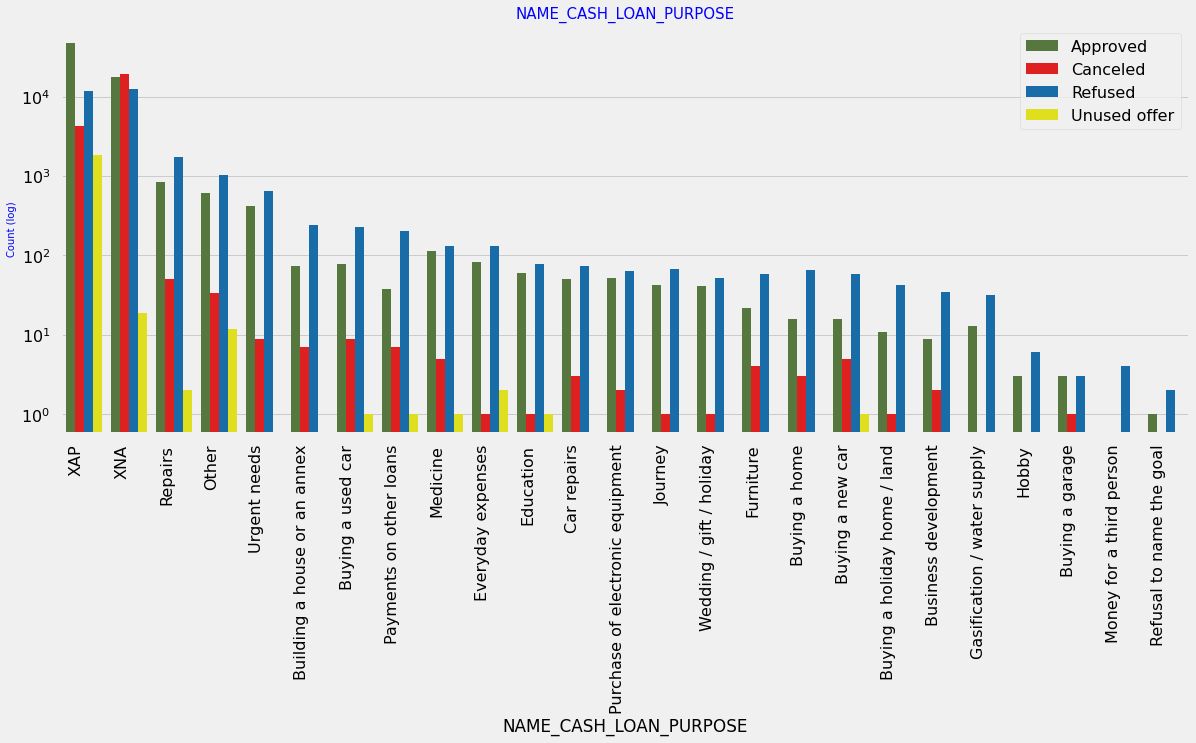

In [151]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

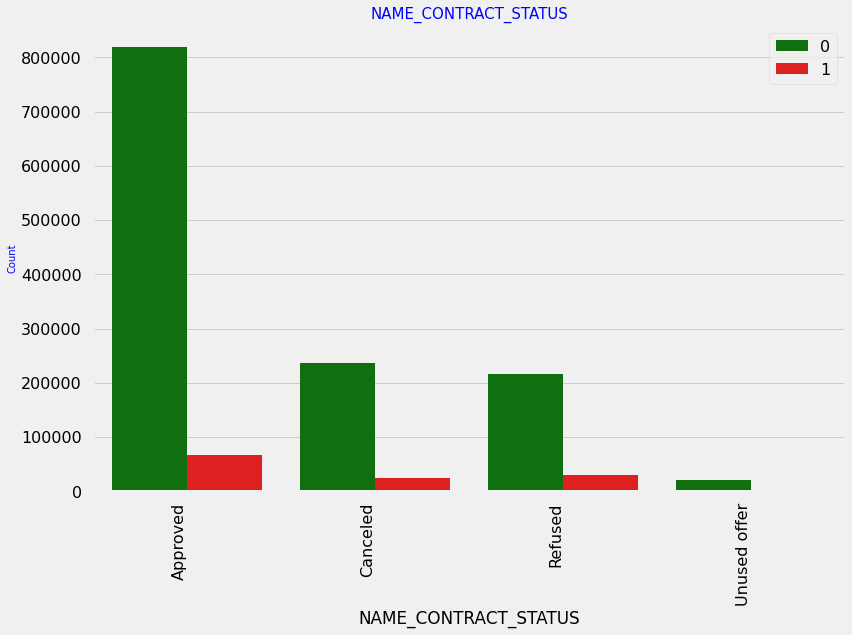

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [152]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

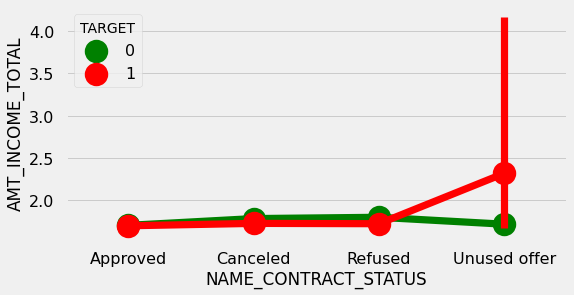

In [153]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

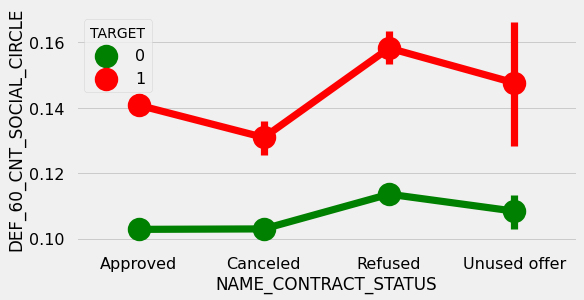

In [154]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')